# MachineMate: Preventive Maintenance for Optimal Machinery Performance

## Introduction
MachineMate offers a comprehensive preventive maintenance solution by seamlessly integrating IoT technology with your machinery. This system monitors and alerts you about upcoming maintenance procedures, ensuring improved machine performance and operational efficiency.

## Benefits
- **Improved Machine Performance:** Experience enhanced reliability and reduced downtime.
- **Cost Savings through Efficiency:** Potential energy cost savings with increased overall efficiency.

## Drawbacks
- **Costs:** Associated with the maintenance service.

## Hypothesis
### Null Hypothesis (H₀)
There is no difference in energy efficiency before and after subscribing to the service.

### Alternative Hypothesis (H₁)
Subscribing to the service leads to improved energy efficiency.

## Methodology
- **Control and Experimental Setup:** Utilize two identical operational locations, comparing the performance for 30 days.
- **Data Collection:** Monitor fridges, freezers, dishwashers, water pressure, and energy consumption with 80 daily measurements for reliability.

## Results
- **Statistical Test:** Employed a t-test to compare means of temperature, energy consumption, and pressure.
- **Primary Metric Significance:** Reject the null hypothesis with a p-value less than 0.05.
- **Regression Analysis:** Bivariate analysis showed statistically significant reductions in energy consumption and fridge temperature.

## Conclusion
- **Energy Consumption Reduction:** Significant average reduction to 2.25kWh, indicating immediate savings.
- **Temperature Stability:** Noticeable improvements in fridge and freezer temperature.
- **Long-Term Benefits:** Reduced strain on machinery, potentially extending their lifespan.

## Recommendations
- **Immediate Implementation:** Implement the preventive maintenance service based on statistically significant results.
- **Continuous Monitoring:** Prolonged use will provide more confidence in the overall performance.
- **Further Analysis:** Consider multivariate regression or analysis of variance for a holistic view, controlling for confounding variables.

## Additional Considerations
- **Autocorrelation:** Acknowledge potential autocorrelation in energy consumption observations.
- **Variance Assumptions:** Be aware of the variance differences among machines and adapt analysis accordingly.

## Future Opportunities
- **Extended Analysis:** Multivariate regression and analysis of variance can provide a more comprehensive understanding.
- **Feature Expansion:** Explore new features with additional machines and metrics.

## Conclusion
MachineMate offers a reliable preventive maintenance solution, backed by statistical evidence, to enhance your machinery's performance, reduce costs, and prolong the life of your equipment. Immediate implementation is recommended, with potential for further analysis to optimize results. Where shall we sign up for this transformative service?


In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Seed for reproducibility
np.random.seed(42)

# Data simulated for 30 days with 50 samples each day
days = 30
samples_per_day = 80
total_samples = days * samples_per_day

# Date range
dates = pd.date_range(start='2024-01-01', periods=total_samples, freq='T')

# Dishwasher Temperature
temperature_control_dishwasher = np.random.normal(loc=78.3, scale=3, size=total_samples)
temperature_preventive_dishwasher = np.random.normal(loc=78.5, scale=2.5, size=total_samples)  

temperature_control_freezer = np.random.normal(loc=-16.3, scale=3, size=total_samples)
temperature_preventive_freezer = np.random.normal(loc=-16.5, scale=2.5, size=total_samples)

# Fridge Temperature
temperature_control_fridge = np.random.normal(loc=5, scale=2, size=total_samples)
temperature_preventive_fridge = np.random.normal(loc=3, scale=2, size=total_samples)

# Energy Consumption 
alpha_control = 2.2  
beta_control = 1.8  
energy_control = (1 - np.random.beta(alpha_control, beta_control, size=total_samples)) * 5 + 1 


alpha_preventive = 1.8  
beta_preventive = 2.2  
energy_preventive = np.random.beta(alpha_preventive, beta_preventive, size=total_samples) * 5  

# Pressure 
pressure_control = np.random.uniform(low=68, high=76.4, size=total_samples)
pressure_preventive = np.random.uniform(low=68.1, high=76.3, size=total_samples) 

# DataFrame
df_control = pd.DataFrame({
    'Date': dates,
    'Fridge_Temperature': temperature_control_fridge,
    'Dishwasher_Temperature': temperature_control_dishwasher,
    'Freezer_Temperature': temperature_control_freezer,
    'EnergyConsumption': energy_control,
    'Pressure': pressure_control,
    'Variant': 'Control'
})

df_preventive = pd.DataFrame({
    'Date': dates,
    'Fridge_Temperature': temperature_preventive_fridge,
    'Dishwasher_Temperature': temperature_preventive_dishwasher,
    'Freezer_Temperature': temperature_preventive_freezer,
    'EnergyConsumption': energy_preventive,
    'Pressure': pressure_preventive,
    'Variant': 'Preventive'
})

# Concatenate 
df_combined = pd.concat([df_control, df_preventive], ignore_index=True)

# Save
df_combined.to_csv('preventive_maintenance_3.csv', index=False)


In [2]:
# Read the combined dataset
df_combined = pd.read_csv('preventive_maintenance_3.csv')

# Extract columns 
columns_to_test = ['Fridge_Temperature', 'Dishwasher_Temperature', 'Freezer_Temperature', 'EnergyConsumption', 'Pressure']

# Significance level. This is set to the standard 5%
alpha = 0.05

# ttests
for column in columns_to_test:
    control_values = df_combined[df_combined['Variant'] == 'Control'][column]
    preventive_values = df_combined[df_combined['Variant'] == 'Preventive'][column]


    t_statistic, p_value = ttest_ind(control_values, preventive_values)

   
    print(f"\nT-test results for {column}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Check for statistical significance 
    if p_value < alpha:
        print("Result is statistically significant.")
    else:
        print("Result is not statistically significant.")



T-test results for Fridge_Temperature:
T-statistic: 32.674548363201836
P-value: 1.2831114697140386e-211
Result is statistically significant.

T-test results for Dishwasher_Temperature:
T-statistic: -0.6437049907243515
P-value: 0.5197975191791331
Result is not statistically significant.

T-test results for Freezer_Temperature:
T-statistic: 0.9058593360000511
P-value: 0.3650557964497222
Result is not statistically significant.

T-test results for EnergyConsumption:
T-statistic: 29.93158801674728
P-value: 1.2526087170500418e-180
Result is statistically significant.

T-test results for Pressure:
T-statistic: 0.6102475930716988
P-value: 0.5417267088786069
Result is not statistically significant.


In [3]:
# binary variable for Subscription (1 for 'Preventive', 0 for 'Control')
df_combined['Subscription'] = (df_combined['Variant'] == 'Preventive').astype(int)

# Define: dependent variables
dependent_variables = ['Fridge_Temperature', 'Dishwasher_Temperature', 'Freezer_Temperature', 'EnergyConsumption', 'Pressure']

# Loop through dependent variables for perform regression analysis
for dependent_variable in dependent_variables:
    X = df_combined['Subscription']  # Independent variable
    y = df_combined[dependent_variable]  # Dependent variable

    X = sm.add_constant(X)  # Add a constant term to the independent variable

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the regression results
    print(f"\nRegression Analysis for {dependent_variable}:")
    print(model.summary())



Regression Analysis for Fridge_Temperature:
                            OLS Regression Results                            
Dep. Variable:     Fridge_Temperature   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1068.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          1.28e-211
Time:                        11:25:48   Log-Likelihood:                -10110.
No. Observations:                4800   AIC:                         2.022e+04
Df Residuals:                    4798   BIC:                         2.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
con

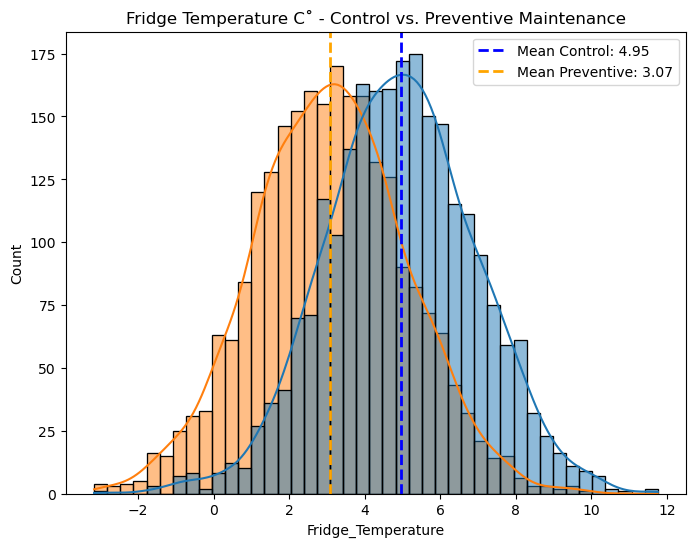

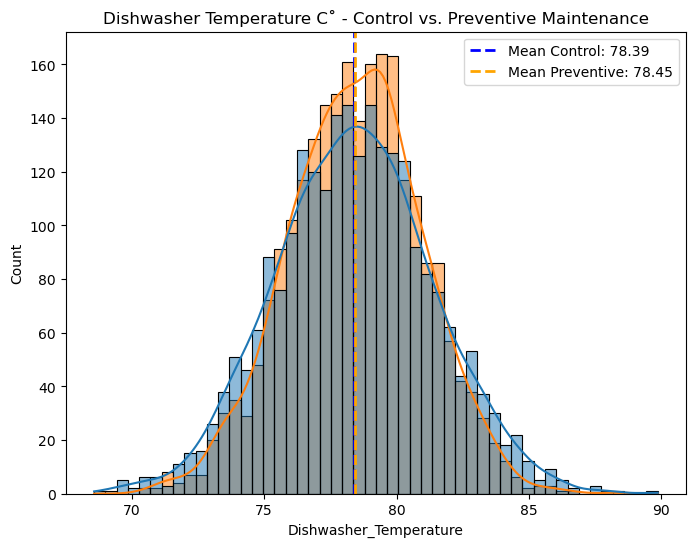

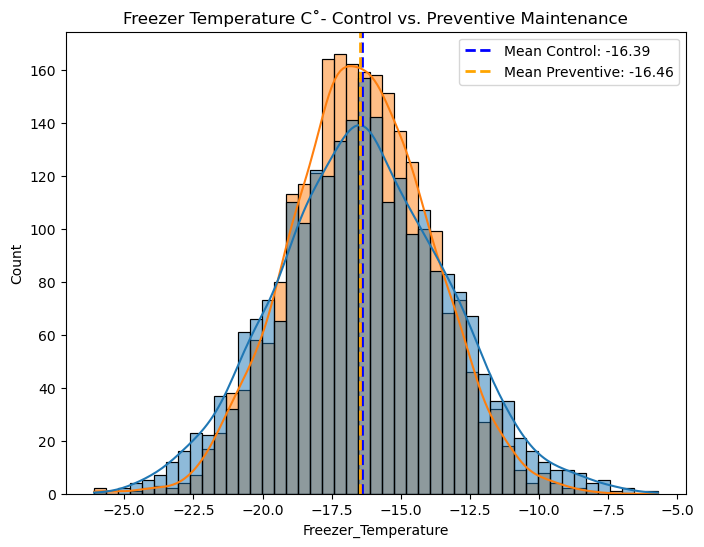

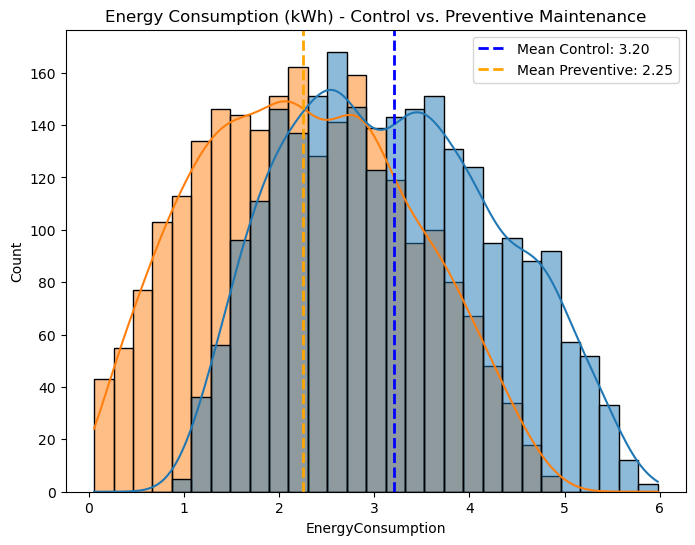

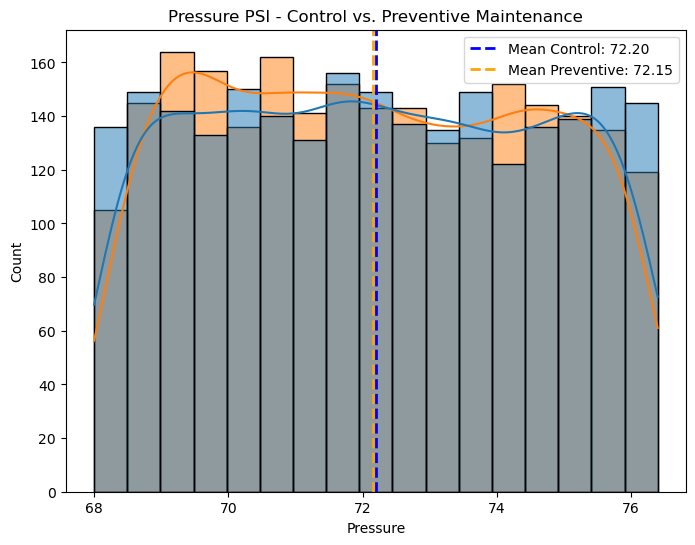

In [5]:
#  plot distribution with mean line
def plot_with_mean_line(data, x, hue, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data, x=x, hue=hue, kde=True, ax=ax)
    control_mean = data[data[hue] == 'Control'][x].mean()
    preventive_mean = data[data[hue] == 'Preventive'][x].mean()
    ax.axvline(control_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Control: {control_mean:.2f}')
    ax.axvline(preventive_mean, color='orange', linestyle='dashed', linewidth=2, label=f'Mean Preventive: {preventive_mean:.2f}')
    ax.legend()
    ax.set_title(title)
    plt.show()


plot_with_mean_line(df_combined, 'Fridge_Temperature', 'Variant', 'Fridge Temperature C˚ - Control vs. Preventive Maintenance')

plot_with_mean_line(df_combined, 'Dishwasher_Temperature', 'Variant', 'Dishwasher Temperature C˚ - Control vs. Preventive Maintenance')

plot_with_mean_line(df_combined, 'Freezer_Temperature', 'Variant', 'Freezer Temperature C˚- Control vs. Preventive Maintenance')

plot_with_mean_line(df_combined, 'EnergyConsumption', 'Variant', 'Energy Consumption (kWh) - Control vs. Preventive Maintenance')

plot_with_mean_line(df_combined, 'Pressure', 'Variant', 'Pressure PSI - Control vs. Preventive Maintenance')

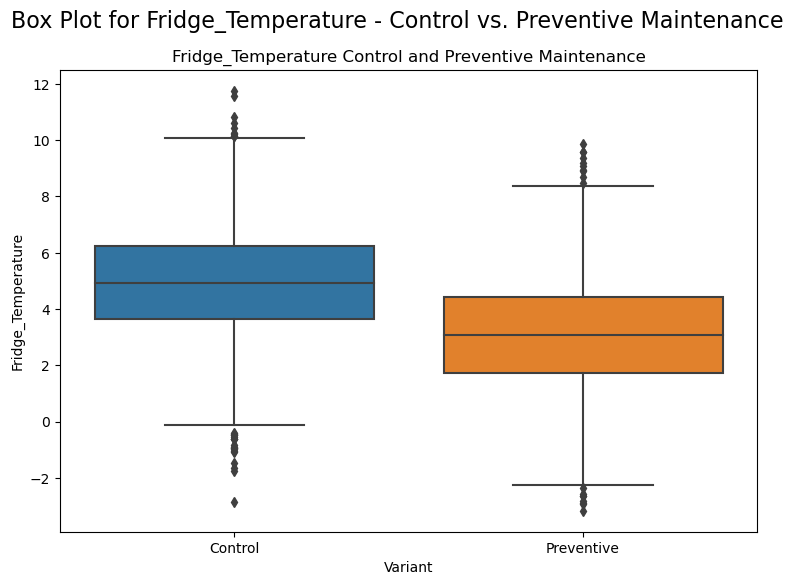

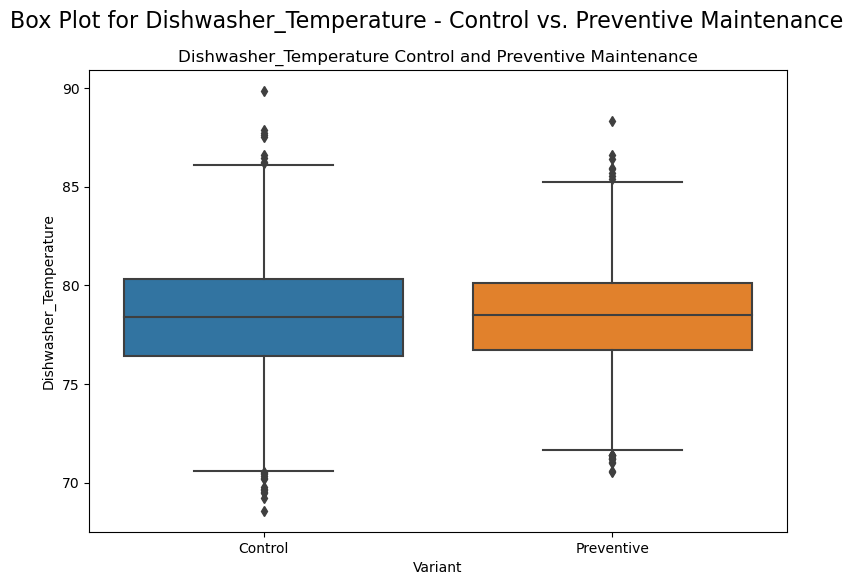

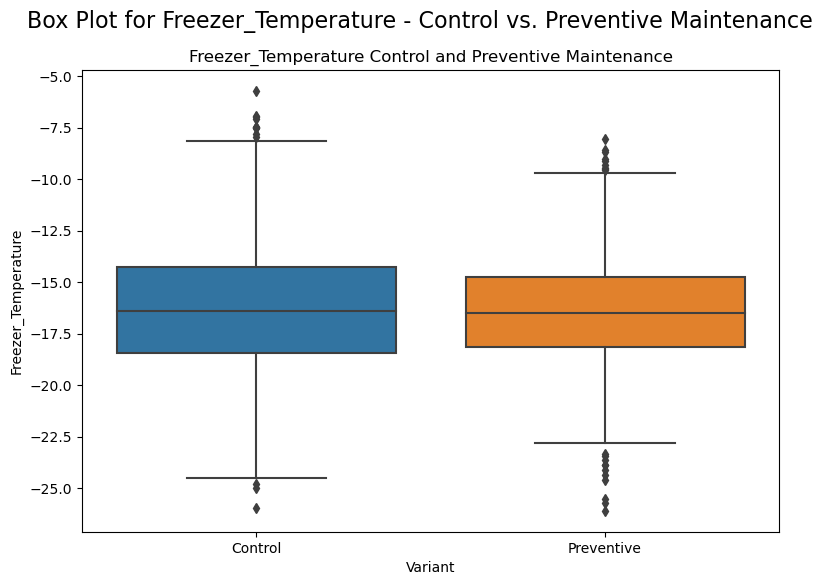

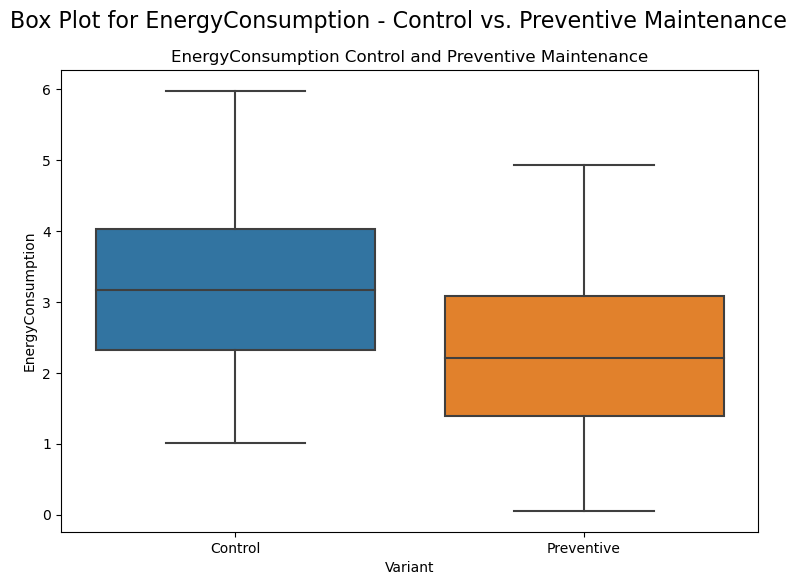

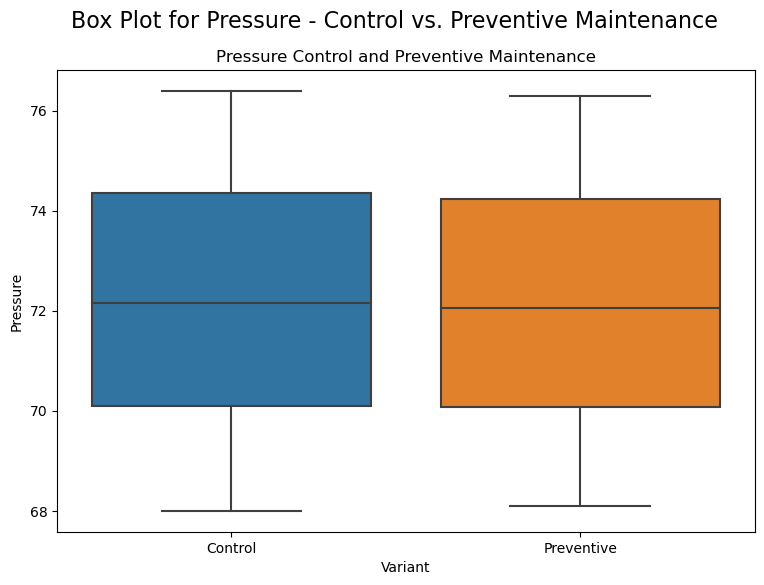

In [6]:
# boxplots for each metric
for column in columns_to_test:
    fig, ax = plt.subplots(figsize=(9, 6))
    fig.suptitle(f'Box Plot for {column} - Control vs. Preventive Maintenance', fontsize=16)
    sns.boxplot(x='Variant', y=column, data=df_combined, ax=ax)
    ax.set_title(f'{column} Control and Preventive Maintenance')
    plt.show()